# Image Classification experiment for CIFAR-10 dataset 

CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) contains 60,000 32*32 color images in 10 classes, with 6000 images per class. 

Task is to build a multiclass image classifier using 2D Convolutional Neural Networks (2D CNNs) to achieve the best possible classification accuracy for the test set.   

In [4]:
#Importing required python packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torchnet.meter.confusionmeter as cm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import utils

import models.resnet as resnet
import models.simple_net as simple_net
import models.simple_net_bn as simple_net_bn

In [5]:
# Assign CUDA device for computations:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Data Transformation 

In [6]:
#transformation for training image set - with flip augmentation
transform_train = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

#transformation for testing image set
transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])


## Load Dataset

In [7]:
#Define the mini-batch size
batch_size = 128

#datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)

#dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Dataset Analysis

In [8]:
#Find the dataset sizes and number of batches

#train set size
train_set_size = len(trainset)

#test set size
test_set_size = len(testset)

#Number of mini-batches in trainset /testset
train_batches = len(trainloader)
test_batches = len(testloader)

print("Train set size : " + str(train_set_size))
print("Training batches : " + str(train_batches))
print("Test set size : " + str(test_set_size))
print("Testing batches : " + str(test_batches))

Train set size : 50000
Training batches : 391
Test set size : 10000
Testing batches : 79


## Data Visualization

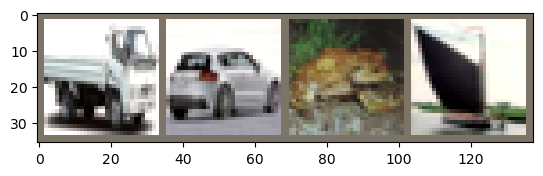

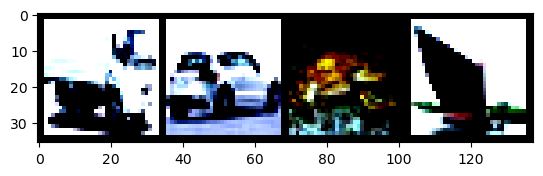

truck   car  frog  ship


In [10]:
#Visualize 4 random training images
viewloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# get some random training images
dataiter = iter(viewloader)
images, labels = next(dataiter)


# show images
utils.imshow(torchvision.utils.make_grid(images))
utils.imshowtransform(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Initializing Networks

In [11]:
simplenet = simple_net.SimpleNet()
simplenet_bn = simple_net_bn.SimpleNet_bn()
resnet34 = resnet.ResNet34()

# pushing the network to the GPU
net = simplenet_bn.to(device)

print(net)

SimpleNet_bn(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv1_bn): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## Training the ANN

In [12]:
#Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()

#Define the optimizer and the learning rate
optimizer = optim.Adam(net.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [13]:
#lists for generating graphs
epochs = list()
training_loss = list()

# loop over the dataset multiple times
for epoch in range(20):  

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    
        # print statistics
        running_loss += loss.item()
    print('[Epoch : %d] train_loss: %.3f' %
          (epoch + 1, running_loss / train_batches))
    epochs.append(epoch)
    training_loss.append(running_loss/train_batches)
    running_loss = 0.0
    scheduler.step()
    
print('Finished Training')

[Epoch : 1] train_loss: 1.518
[Epoch : 2] train_loss: 1.259
[Epoch : 3] train_loss: 1.165
[Epoch : 4] train_loss: 1.102
[Epoch : 5] train_loss: 1.046
[Epoch : 6] train_loss: 1.008
[Epoch : 7] train_loss: 0.981
[Epoch : 8] train_loss: 0.947
[Epoch : 9] train_loss: 0.926
[Epoch : 10] train_loss: 0.902
[Epoch : 11] train_loss: 0.822
[Epoch : 12] train_loss: 0.810
[Epoch : 13] train_loss: 0.805
[Epoch : 14] train_loss: 0.803
[Epoch : 15] train_loss: 0.798
[Epoch : 16] train_loss: 0.793
[Epoch : 17] train_loss: 0.788
[Epoch : 18] train_loss: 0.785
[Epoch : 19] train_loss: 0.786
[Epoch : 20] train_loss: 0.778
Finished Training


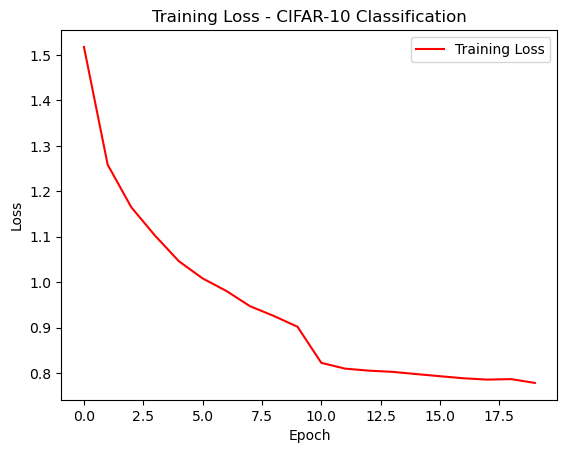

In [14]:
#Plot the epoch vs. training loss
plt.figure(1)
plt.title("Training Loss - CIFAR-10 Classification")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(epochs, training_loss, color='r', label="Training Loss")
plt.legend()
plt.show()

## Loading a trained ResNet34 model

In [15]:
#Saving trained model
#torch.save(net.state_dict(), "trained_resnet_model.pth")

#Loading the model
model = resnet.ResNet34().to(device)
model.load_state_dict(torch.load("trained_resnet_model.pth"))

<All keys matched successfully>

## Test model

In [16]:
#Testing the trained model with testing data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 89 %


In [17]:
#Evaluate the class-wise accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 96 %
Accuracy of   car : 100 %
Accuracy of  bird : 84 %
Accuracy of   cat : 70 %
Accuracy of  deer : 88 %
Accuracy of   dog : 90 %
Accuracy of  frog : 88 %
Accuracy of horse : 92 %
Accuracy of  ship : 96 %
Accuracy of truck : 92 %


<AxesSubplot:>

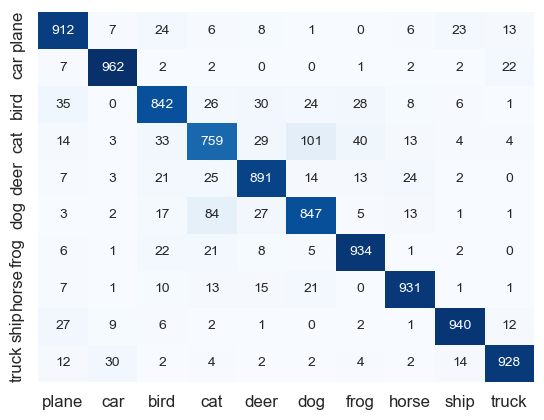

In [18]:
#Get the confusion matrix for testing data
confusion_matrix = cm.ConfusionMeter(10)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        confusion_matrix.add(predicted, labels)
    #print(confusion_matrix.conf)

#Confusion matrix as a heatmap
con_m = confusion_matrix.conf
df_con_m = pd.DataFrame(con_m, index= [i for i in classes], columns = [i for i in classes])
sn.set(font_scale= 1.1)
sn.heatmap(df_con_m, annot=True,fmt='g' ,  annot_kws={"size" : 10}, cbar = False, cmap="Blues") 